In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go # 그래프 객체 생성
from plotly.subplots import make_subplots
import datetime
import seaborn as sns 
import scipy.stats
import plotly.express as px
import os 
from scipy import stats
from sklearn import metrics
import statsmodels.formula.api as smf
import scipy.stats as st
import pylab
import csv

os.getcwd()

'c:\\Users\\seong\\Desktop\\Enittproj\\Enitt'

In [2]:
## merge 1, 2 데이터
data1 = pd.read_csv("./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/A365. 반포써밋2블럭 발전량.csv", encoding="ms949")
data2 = pd.read_csv("./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/365. 반포써밋2블럭 발전량.csv", encoding="ms949")
data3 = pd.read_csv("./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/A365. 반포써밋2블럭 환경센서.csv", encoding="ms949")
data4 = pd.read_csv("./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/365. 반포써밋2블럭 환경정보.csv", encoding="ms949")



data_12 = pd.concat([data2, data1])
data_34 = pd.concat([data4, data3])
ent_data_solar = data_12.reset_index().drop('index', axis=1)
ent_data_solar

ent_data_weather = data_34.reset_index().drop('index', axis=1)
ent_data_weather

,env_index,env_date,env_time,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp
0,1,2018-10-22,12:44:29,322,316,24.8,17.6
1,2,2018-10-22,12:45:21,320,314,25.0,17.7
2,3,2018-10-22,12:46:12,320,312,25.1,17.9
3,4,2018-10-22,12:47:04,326,319,24.9,18.1
4,5,2018-10-22,12:47:56,335,329,24.9,18.0
...,...,...,...,...,...,...,...
615430,683664,2020-10-22,23:19:00,0,0,6.7,8.1
615431,683665,2020-10-22,23:23:57,0,0,6.7,8.0
615432,683666,2020-10-22,23:28:53,0,0,6.7,8.0
615433,683667,2020-10-22,23:33:49,0,0,6.7,8.0


In [3]:
## 파일불러오기
# def ent_loadfile(solar_path, weather_path):
#     ent_data_solar = pd.read_csv(solar_path)
#     ent_data_weather = pd.read_csv(weather_path)

#     return ent_data_solar, ent_data_weather


# ent_data_solar, ent_data_weather = ent_loadfile(
#     "./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/A365. 반포써밋2블럭 발전량.csv", 
#     "./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/A365. 반포써밋2블럭 환경센서.csv")

# ent_data_solar["pow_date"].unique() ## 약 2018-11-26~ 2020-03-02 
# ent_data_weather["env_date"].unique() ## 약 2018-11-26 ~ 2020-03-03  

# -> low data인 환경정보로 정리 필요 // 

## 외부데이터 불러오기 
def other_loadfile(a, b, c): ## 임의로 수정 필요 
    other_data_dummy1 = pd.read_csv(a, encoding="ms949")
    other_data_dummy2 = pd.read_csv(b, encoding="ms949")
    other_data_dummy3 = pd.read_csv(c, encoding="ms949")

    return other_data_dummy1, other_data_dummy2, other_data_dummy3

other_data_dummy1, other_data_dummy2, other_data_dummy3 = other_loadfile(
    "./ENITT_SOLAR_DATA/re_allweather/allweather2018.csv",
    "./ENITT_SOLAR_DATA/re_allweather/allweather2019.csv",
    "./ENITT_SOLAR_DATA/re_allweather/allweather2020.csv")


other_data_dummyall = other_data_dummy1.merge(other_data_dummy2, how="outer").merge(other_data_dummy3, how="outer")
other_data_weather = other_data_dummyall[other_data_dummyall["지점명"] == "수원"]
other_data_weather["지점명"].unique()

other_data_dummy1 = pd.read_csv("./ENITT_SOLAR_DATA/otherdata/otherdata.csv", encoding="ms949")
other_data_solar = other_data_dummy1[other_data_dummy1["발전기명"] == "안산연성정수장태양광"]
other_data_solar["발전기명"].unique()
# 2019-06-16 13:00
# ent_data_weather.loc[ent_data_weather["env_date"] == "2019-06-16"]

# print()
ent_data_solar1 = ent_data_solar[ent_data_solar["pow_id"] == 1]
ent_data_weather

,env_index,env_date,env_time,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp
0,1,2018-10-22,12:44:29,322,316,24.8,17.6
1,2,2018-10-22,12:45:21,320,314,25.0,17.7
2,3,2018-10-22,12:46:12,320,312,25.1,17.9
3,4,2018-10-22,12:47:04,326,319,24.9,18.1
4,5,2018-10-22,12:47:56,335,329,24.9,18.0
...,...,...,...,...,...,...,...
615430,683664,2020-10-22,23:19:00,0,0,6.7,8.1
615431,683665,2020-10-22,23:23:57,0,0,6.7,8.0
615432,683666,2020-10-22,23:28:53,0,0,6.7,8.0
615433,683667,2020-10-22,23:33:49,0,0,6.7,8.0


In [4]:
## DELETE COLUMN AND EDIT COLUMN

## 지점', '지점명', '기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)','일조(hr)', '일사(MJ/m2)', '전운량(10분위)', '운형(운형약어)', '지면온도(°C)'
#=>

## '기온', '강수량', '풍속', '풍향', '습도', '일조', '일사', '전운량', '지면온도'
reset_other_weather = other_data_weather.set_index("일시")
reset_other_weather_need = reset_other_weather[['기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)','일조(hr)', '일사(MJ/m2)', '적설(cm)', '전운량(10분위)', '10cm 지중온도(°C)']]
reset_other_weather_need.columns = ['기온', '강수량', '풍속', '풍향', '습도', '일조', '일사', '적설', '전운량', '지중온도']
reset_other_weather_need.fillna(0, inplace=True)
reset_other_weather_need



,기온,강수량,풍속,풍향,습도,일조,일사,적설,전운량,지중온도
일시,,,,,,,,,,
2018-01-01 00:00,-1.8,0.0,2.0,290.0,43.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 01:00,-2.6,0.0,0.9,270.0,46.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 02:00,-3.0,0.0,1.1,320.0,48.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 03:00,-4.2,0.0,0.4,0.0,58.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 04:00,-5.3,0.0,0.0,0.0,65.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-10-31 19:00,14.2,0.0,1.0,270.0,65.0,0.0,0.0,0.0,8.0,0.0
2020-10-31 20:00,14.7,0.0,1.3,230.0,63.0,0.0,0.0,0.0,10.0,0.0
2020-10-31 21:00,14.7,0.0,1.7,200.0,62.0,0.0,0.0,0.0,6.0,0.0


In [5]:
## 기업 solar weather EDA -> 필요
ent_data_weather.columns 

ent_data_weather["env_levelsolar"].describe()
ent_data_weather["env_slopesolar"].describe()


## 기업 날씨 데이터 1시간 별로 groupby , ( slopesolar, levelsolar => sum) , ( modtemp, airtemp => mean )
def groupby_weather():
    ## time 구분
    dummy_time_list = []
    for i in ent_data_weather["env_time"]:
        dummy_time_list.append(i[:2])

    ent_data_weather["dummy_time"] = dummy_time_list
    dummy_groupbyall = ent_data_weather.groupby(["env_date", "dummy_time"]).mean()

    # ent_data_dummy1_weather = ent_data_weather[["env_date", "dummy_time", "env_slopesolar", "env_levelsolar"]]
    # ent_data_dummy2_weather = ent_data_weather[["env_date", "dummy_time", "env_modtemp", "env_airtemp"]]
    # dummy_groupby1 = ent_data_dummy1_weather.groupby(["env_date", "dummy_time"]).mean()
    # dummy_groupby2 = ent_data_dummy2_weather.groupby(["env_date", "dummy_time"]).mean()
    # ent_data_weather_groupby = dummy_groupby1.merge(dummy_groupby2, on=["env_date", "dummy_time"], how="outer")

    ent_data_weather_groupby = dummy_groupbyall.reset_index() ## 그룹화된 인덱스 풀기 

    ### 발전량이 거의 없는 데이터 삭제 ( 8~ 19 까지만 살린다)
    drop_data = ent_data_weather_groupby.isin({"dummy_time" : ["00", "01", "02", "03", "04", "05", "06", "07","08", "19", "20", "21", "22", "23"]})
    ent_data_weather_sort = ent_data_weather_groupby[~drop_data].dropna()
    # print(ent_data_weather_sort)
    ent_data_weather_sort.drop("env_index", axis=1, inplace=True)

    return ent_data_weather_sort




## 기업 발전량 데이터 groupby
def groupby_solar():
    ## 필요한 컬럼만 가져오기
    ent_data_need = ent_data_solar1[["pow_date", "pow_time", "pow_totpower"]]

    ## time 구분
    dummy_time_list = []
    for i in ent_data_need["pow_time"]:
        dummy_time_list.append(i[:2])
    ent_data_need["dummy_time"] = dummy_time_list


    # dummy_groupby1 = ent_data_need.groupby(["pow_date", "dummy_time"]).min()
    # dummy_groupby2 = ent_data_need.groupby(["pow_date", "dummy_time"]).max()

    ## 유일한 값이면 어떻하지? 더 생각을 해봐야함,, 실제로 유일한 값이 있음 고쳐야 한다. 
    ## 최대값과 최솟값 차 = 1시간동안 발전한 총용량
    ent_data_perhour = dummy_groupby2["pow_totpower"] - dummy_groupby1["pow_totpower"]
    ent_data_perhour = ent_data_perhour.reset_index()

    ### 발전량이 거의 없는 데이터 삭제 ( 8~ 19 까지만 살린다)
    drop_data = ent_data_perhour.isin({"dummy_time" : ["00", "01", "02", "03", "04", "05", "06", "07","08", "19", "20", "21", "22", "23"]})
    ent_data_perhour_sort = ent_data_perhour[~drop_data].dropna()

    return ent_data_perhour_sort
    # print(ent_data_perhour_sort["dummy_time"].unique())

### RESET 발전량 :: 직류 전압 X 직류 전류 : 발전량 ,, GROUPBY해서 직류X전류 의 평균량으로 구한다
def groupby_solar_reset():
    ## 필요한 컬럼만 가져오기
    ent_data_need = ent_data_solar1[["pow_date", "pow_time", "pow_dcv", "pow_dca"]]

    ## time 구분
    dummy_time_list = []
    for i in ent_data_need["pow_time"]:
        dummy_time_list.append(i[:2])
    ent_data_need["dummy_time"] = dummy_time_list

    ent_data_need["watt"] = ent_data_need["pow_dcv"] * ent_data_need["pow_dca"]

    ## RESET 발전량 :: 직류 전압 X 직류 전류 : 발전량 ,, GROUPBY해서 직류X전류 의 평균량으로 구한다
    ent_data_perhour = ent_data_need.groupby(["pow_date", "dummy_time"]).mean()
    ent_data_perhour = ent_data_perhour.reset_index()


    drop_data = ent_data_perhour.isin({"dummy_time" : ["00", "01", "02", "03", "04", "05", "06", "07","08", "19", "20", "21", "22", "23"]})
    ent_data_perhour_sort = ent_data_perhour[~drop_data].dropna()

    return ent_data_perhour_sort


### weather, solar join
def join_weather_solar(a, b):
    sub_index1 = a["env_date"] + " " + a["dummy_time"] + ":00"
    a.index = sub_index1

    sub_index2 = b["pow_date"] + " " + b["dummy_time"] + ":00"
    b.index = sub_index2

    joinset = a.join(b[["pow_dcv", "pow_dca", "watt" ]])
    ent_data_solar_weather = joinset.dropna()


    return ent_data_solar_weather

ent_data_weather_sort = groupby_weather()
ent_data_perhour_sort = groupby_solar_reset()
# print(ent_data_perhour_sort)
ent_data_solar_weather = join_weather_solar(ent_data_weather_sort, ent_data_perhour_sort)
ent_data_solar_weather
# pow_perhour 
# sns.boxplot(ent_data_weather_sort["env_slopesolar"])
# sns.boxplot(ent_data_weather_sort["env_levelsolar"])
# sns.boxplot(data = ent_data_weather_sort[["env_slopesolar", "env_levelsolar"]])
# ent_data_weather_sort[["env_slopesolar", "env_levelsolar"]]

# print(len(joinset) - 2504)

ent_data_solar_weather.corr()

,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp,pow_dcv,pow_dca,watt
env_slopesolar,1.000000,0.922769,0.607467,0.261036,0.243472,0.979570,0.981998
env_levelsolar,0.922769,1.000000,0.420632,0.074844,0.373926,0.856566,0.877689
env_modtemp,0.607467,0.420632,1.000000,0.913855,-0.365574,0.653093,0.603966
env_airtemp,0.261036,0.074844,0.913855,1.000000,-0.571430,0.320259,0.259909
pow_dcv,0.243472,0.373926,-0.365574,-0.571430,1.000000,0.182730,0.251490
pow_dca,0.979570,0.856566,0.653093,0.320259,0.182730,1.000000,0.995531
watt,0.981998,0.877689,0.603966,0.259909,0.251490,0.995531,1.000000


In [6]:
## 기업, 공공 join

join_ent_other = ent_data_solar_weather.join(reset_other_weather_need)
join_ent_other["일사"].fillna(0, inplace=True)
# join_ent_other
join_ent_other["match_solar"] = join_ent_other["일사"] * 1000000 / 3600
join_ent_other_set = join_ent_other.drop(["env_date", "dummy_time"], axis=1)

## csv로 저장
join_ent_other_set.to_csv('banpo1_join.csv', encoding='utf-8')

join_ent_other_set


,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp,pow_dcv,pow_dca,watt,기온,강수량,풍속,풍향,습도,일조,일사,적설,전운량,지중온도,match_solar
2018-10-22 12:00,333.375000,321.937500,25.050000,17.881250,480.116279,11.560465,5536.874419,17.9,0.0,1.0,160.0,43.0,1.0,1.93,0.0,8.0,0.0,536.111111
2018-10-22 13:00,490.514286,563.442857,28.157143,18.405714,481.428571,14.126531,6808.306122,19.5,0.0,1.7,140.0,42.0,0.7,1.61,0.0,8.0,0.0,447.222222
2018-10-22 14:00,368.214286,426.042857,26.777143,19.221429,483.090909,10.850909,5217.690909,19.7,0.0,1.8,200.0,38.0,0.8,1.59,0.0,8.0,0.0,441.666667
2018-10-22 15:00,242.214286,294.400000,21.861429,18.455714,483.459016,6.842623,3306.254098,19.0,0.0,1.3,180.0,41.0,0.6,1.21,0.0,8.0,0.0,336.111111
2018-10-22 16:00,116.159420,132.362319,18.288406,17.346377,480.047619,3.265079,1589.776190,18.5,0.0,1.8,200.0,41.0,0.2,0.66,0.0,9.0,0.0,183.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-22 14:00,491.916667,695.333333,23.758333,17.483333,490.250000,14.725000,7211.983333,18.1,0.0,4.5,270.0,44.0,1.0,2.06,0.0,3.0,0.0,572.222222
2020-10-22 15:00,385.500000,638.750000,21.791667,17.800000,499.916667,10.200000,5104.866667,17.2,0.0,4.4,270.0,47.0,1.0,1.85,0.0,2.0,0.0,513.888889
2020-10-22 16:00,154.000000,280.461538,16.684615,15.915385,472.307692,3.623077,1734.030769,16.7,0.0,4.4,270.0,46.0,1.0,1.27,0.0,1.0,0.0,352.777778
2020-10-22 17:00,11.166667,15.750000,12.875000,13.850000,424.500000,0.216667,94.350000,15.6,0.0,3.3,270.0,45.0,1.0,0.63,0.0,1.0,0.0,175.000000


2.795335614764482
-1.3053942318421559


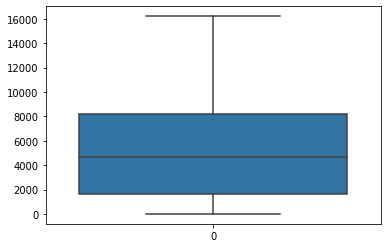

In [7]:
## 이상치 제거

import pandas as pd
from scipy import stats

deleteoutlier = stats.zscore(join_ent_other_set["watt"])
join_ent_other_set["z_score"] = deleteoutlier

join_ent_other_del = join_ent_other_set.loc[join_ent_other_set['z_score'].abs()<=3]
sns.boxplot(data = join_ent_other_del["watt"])

# df.loc[df['z_score'].abs()<=3]
print(join_ent_other_del['z_score'].max())
print(join_ent_other_del['z_score'].min())
## 다시 저장
join_ent_other_del.to_csv('banpo1_join.csv', encoding='utf-8')

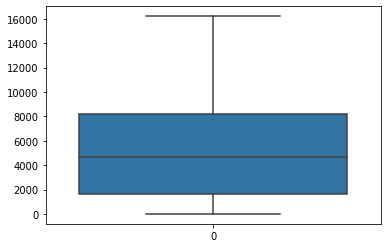

In [8]:
sns.boxplot(data = join_ent_other_set["watt"])

In [9]:
join_ent_other_set.corr()

,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp,pow_dcv,pow_dca,watt,기온,강수량,풍속,풍향,습도,일조,일사,적설,전운량,지중온도,match_solar,z_score
env_slopesolar,1.000000,0.922769,0.607467,0.261036,0.243472,0.979570,0.981998,0.213852,-0.125288,0.080234,0.079151,-0.331865,0.521316,0.839998,-0.039394,-0.381401,-0.003259,0.839998,0.981998
env_levelsolar,0.922769,1.000000,0.420632,0.074844,0.373926,0.856566,0.877689,0.028737,-0.128995,0.088889,0.145568,-0.470201,0.606171,0.796714,-0.024526,-0.507432,-0.003887,0.796714,0.877689
env_modtemp,0.607467,0.420632,1.000000,0.913855,-0.365574,0.653093,0.603966,0.884179,-0.018123,0.042415,-0.093636,0.013897,0.127131,0.595327,-0.138398,0.034302,0.020750,0.595327,0.603966
env_airtemp,0.261036,0.074844,0.913855,1.000000,-0.571430,0.320259,0.259909,0.988688,0.033624,0.093144,-0.105923,0.147349,-0.077764,0.337791,-0.142751,0.201570,0.026968,0.337791,0.259909
pow_dcv,0.243472,0.373926,-0.365574,-0.571430,1.000000,0.182730,0.251490,-0.592522,-0.097939,-0.029881,0.065872,-0.192660,0.230072,0.125021,-0.000575,-0.222584,-0.014440,0.125021,0.251490
pow_dca,0.979570,0.856566,0.653093,0.320259,0.182730,1.000000,0.995531,0.281384,-0.118918,0.055483,0.036974,-0.257438,0.466393,0.812960,-0.079257,-0.316324,-0.002130,0.812960,0.995531
watt,0.981998,0.877689,0.603966,0.259909,0.251490,0.995531,1.000000,0.221280,-0.123000,0.059199,0.047896,-0.276685,0.485551,0.807626,-0.080033,-0.343999,-0.003409,0.807626,1.000000
기온,0.213852,0.028737,0.884179,0.988688,-0.592522,0.281384,0.221280,1.000000,0.047792,0.117232,-0.103304,0.157757,-0.101345,0.315179,-0.143283,0.227181,0.026080,0.315179,0.221280
강수량,-0.125288,-0.128995,-0.018123,0.033624,-0.097939,-0.118918,-0.123000,0.047792,1.000000,-0.004909,-0.062644,0.218157,-0.171306,-0.159630,0.003460,0.146886,-0.002635,-0.159630,-0.123000
풍속,0.080234,0.088889,0.042415,0.093144,-0.029881,0.055483,0.059199,0.117232,-0.004909,1.000000,0.257377,-0.134523,0.134559,0.218838,0.049181,-0.069890,-0.004231,0.218838,0.059199


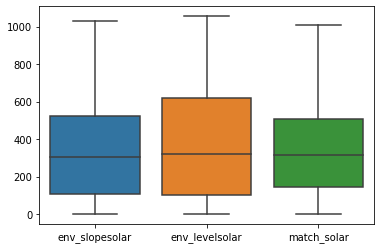

In [10]:
sns.boxplot(data = join_ent_other_set[["env_slopesolar", "env_levelsolar", "match_solar"]])

In [11]:
import scipy.stats

print(scipy.stats.pearsonr(join_ent_other_set["env_levelsolar"], join_ent_other_set["match_solar"]), scipy.stats.pearsonr(join_ent_other_set["env_slopesolar"], join_ent_other_set["match_solar"]))
print("------------------")
print(scipy.stats.pearsonr(join_ent_other_set["env_levelsolar"], join_ent_other_set["watt"]), scipy.stats.pearsonr(join_ent_other_set["env_slopesolar"], join_ent_other_set["watt"]), scipy.stats.pearsonr(join_ent_other_set["match_solar"], join_ent_other_set["watt"]))

(0.7967140847863701, 0.0) (0.8399981273674204, 0.0)
------------------
(0.8776890170780028, 0.0) (0.981998407161808, 0.0) (0.8076259710186875, 0.0)


In [12]:
import statsmodels.formula.api as smf

my_model = smf.ols(formula = "watt~env_slopesolar", data=join_ent_other_set)
my_model = my_model.fit()
my_model.summary()

my_model2 = smf.ols(formula = "watt~match_solar", data=join_ent_other_set)
my_model2 = my_model2.fit()
my_model3 = smf.ols(formula = "match_solar~env_slopesolar", data=join_ent_other_set)
my_model3 = my_model3.fit()
print(my_model.summary())
print(my_model2.summary())
print(my_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                   watt   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 1.243e+05
Date:                Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                        00:39:40   Log-Likelihood:                -36969.
No. Observations:                4601   AIC:                         7.394e+04
Df Residuals:                    4599   BIC:                         7.395e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        108.5102     18.078      6.

In [14]:
import datetime

prophet_data = join_ent_other_del
prophet_index = pd.to_datetime(prophet_data.index)
prophet_data.index = prophet_index
prophet_data.to_csv("testprophet.csv", encoding='utf-8')